In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D
import lmoments
from matplotlib.pylab import rcParams
import warnings as _warnings
from collections import OrderedDict
from numpy.random import randint as _randint
import lmoments
from pdb import set_trace as stop
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import genextreme as gev
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde
from scipy.stats import zscore
from scipy.spatial import distance, distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster import hierarchy


In [3]:
stazioni = ["andria", "bari", "barletta_casardi", 
            "brindisi", "brindisi_sisri", "candela_ex_comes", 
            "carbonara", "casamassima", "cisternino", "foggia", 
            "francavilla_fontana", "galatina", "grottaglie", 
            "lecce", "lecce_cerrate", "maglie", "manfredonia_liceo", 
            "massafra", "molfetta", "monopoli", "san_pancrazio_salentino", 
            "san_severo", "taranto", "taranto_san_vito", "torchiarolo"]

/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


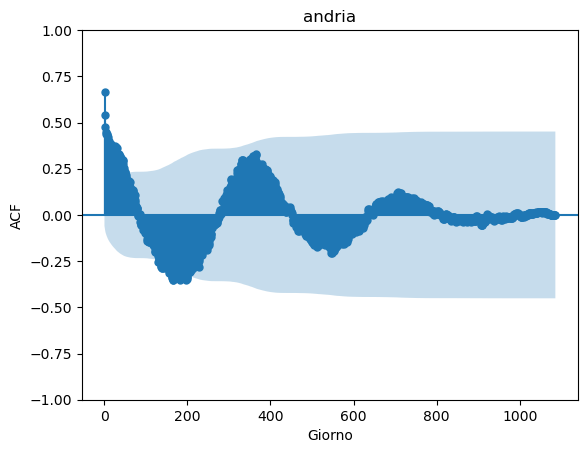

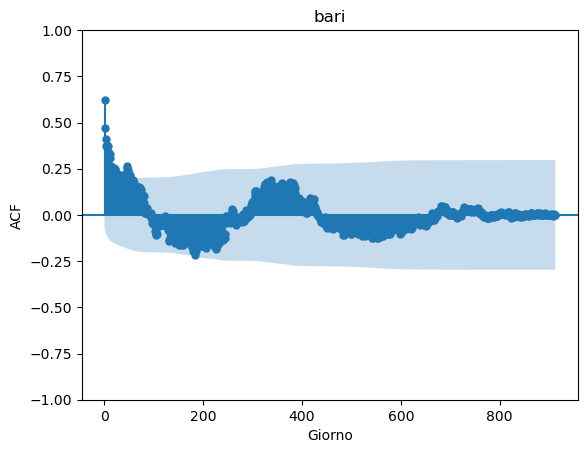

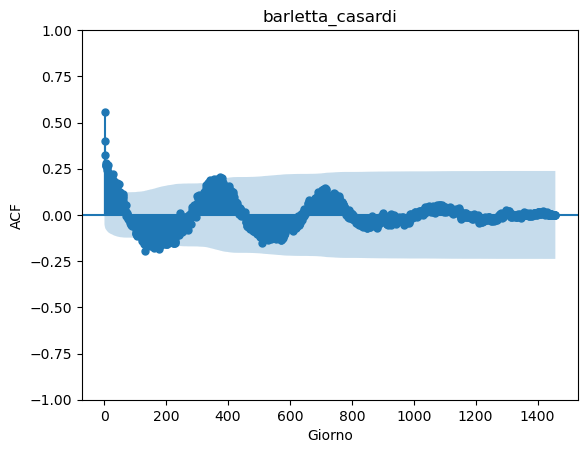

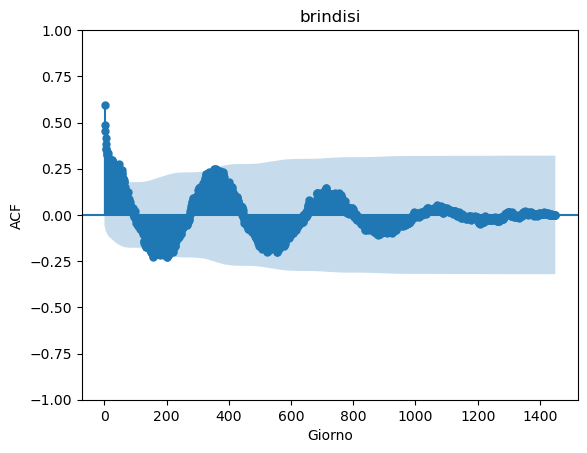

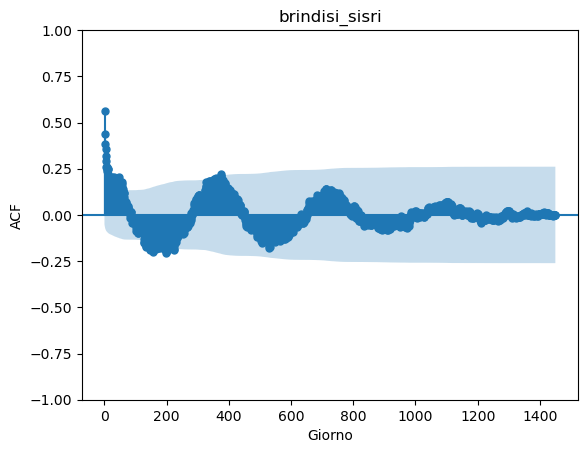

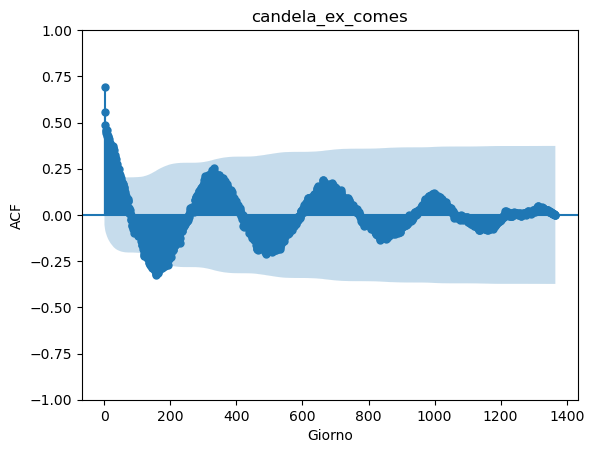

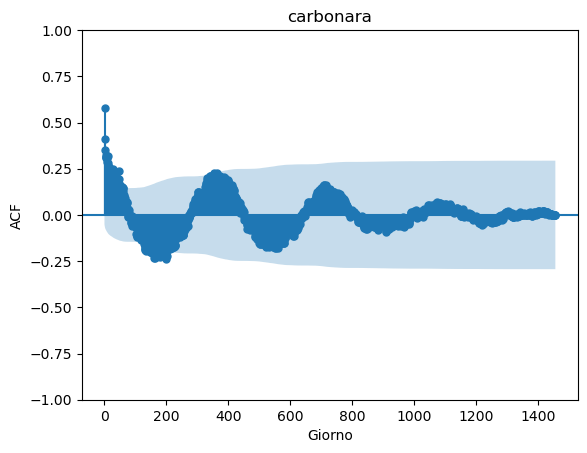

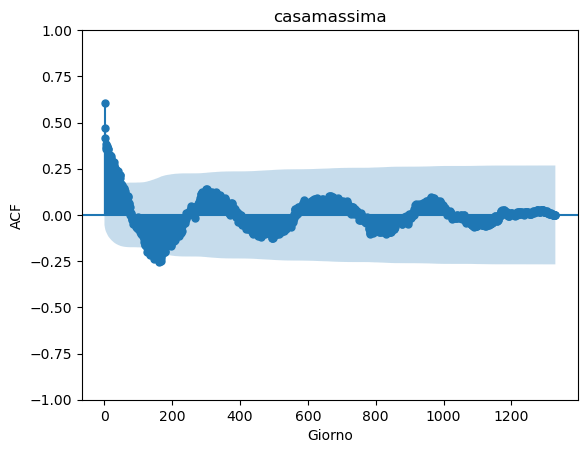

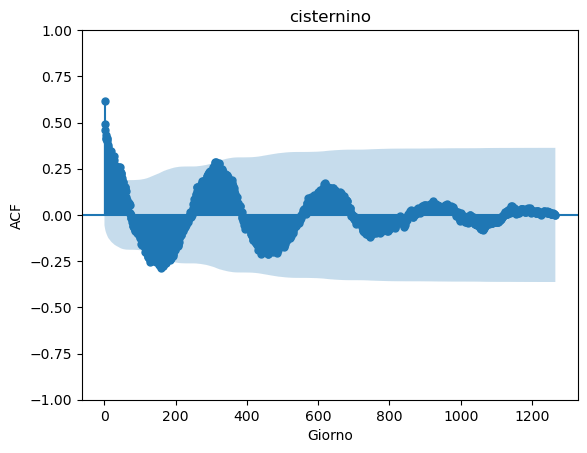

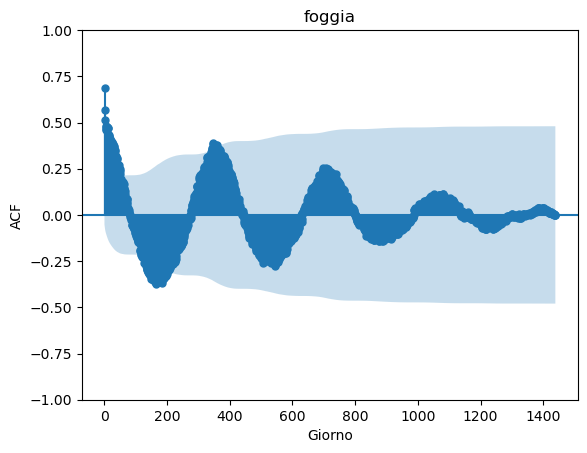

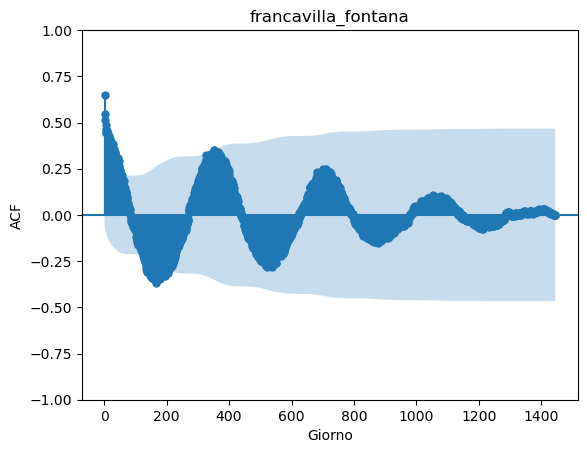

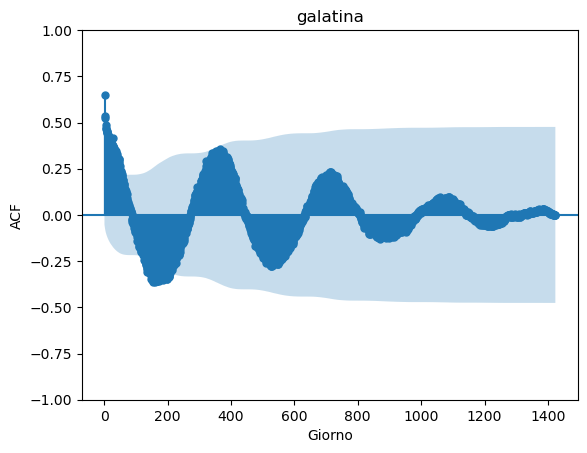

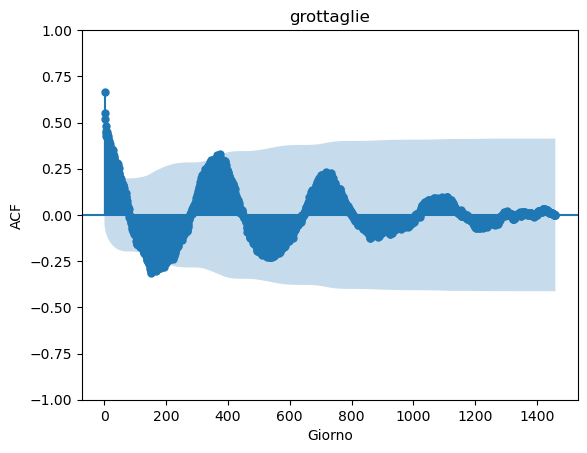

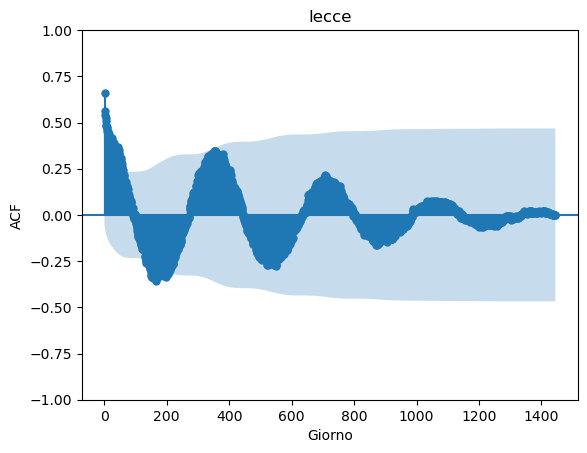

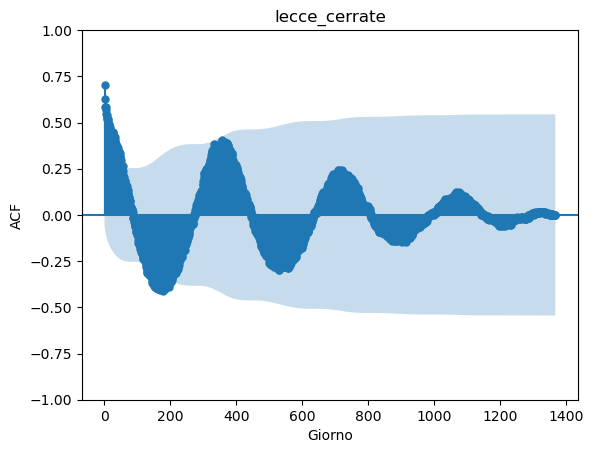

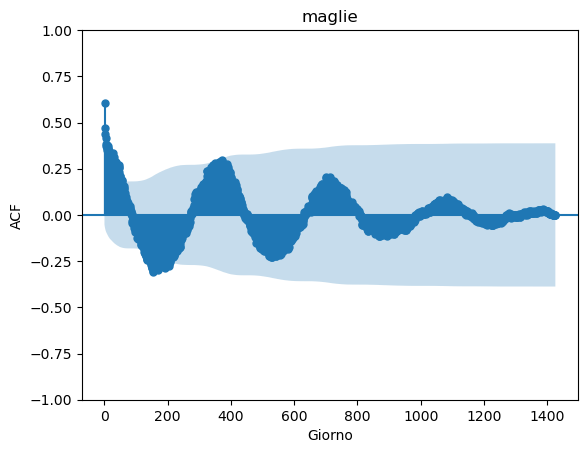

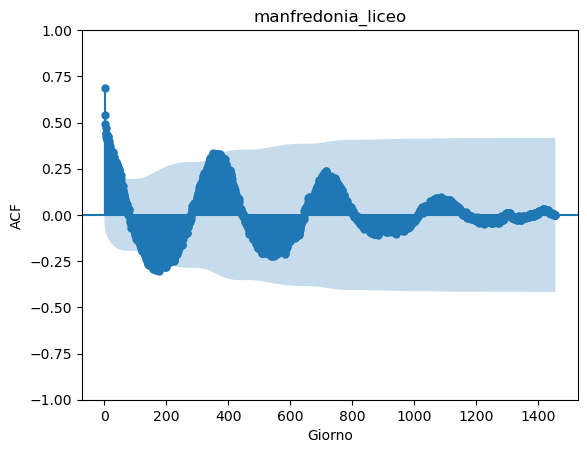

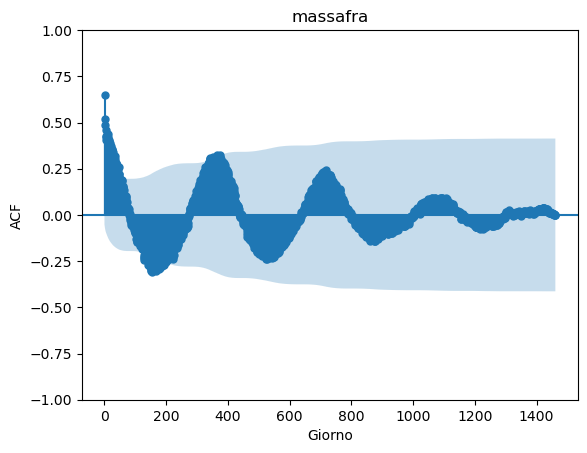

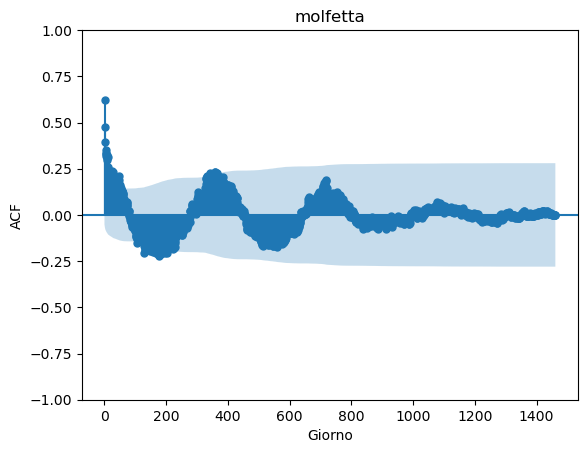

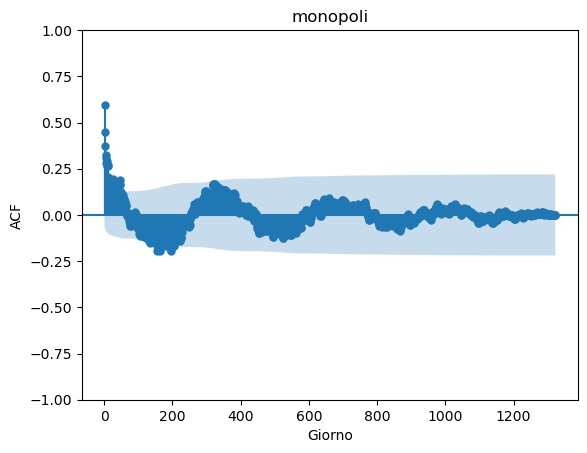

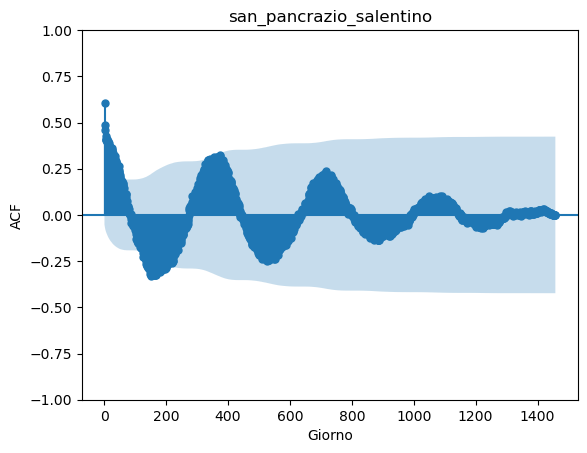

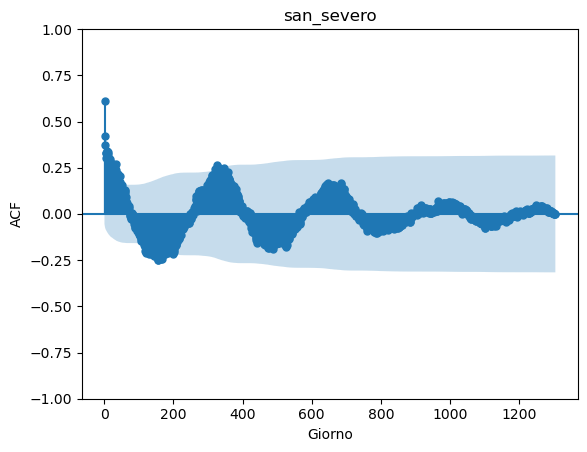

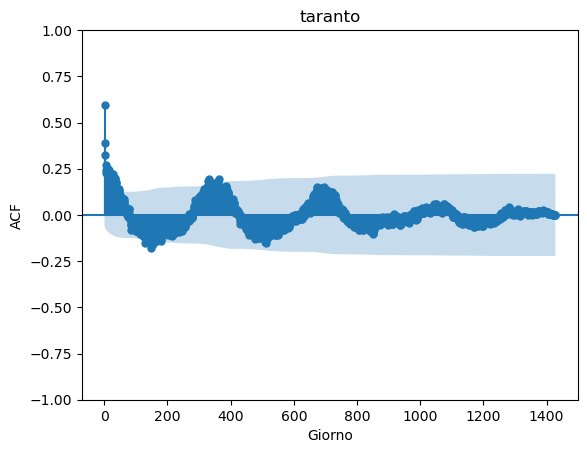

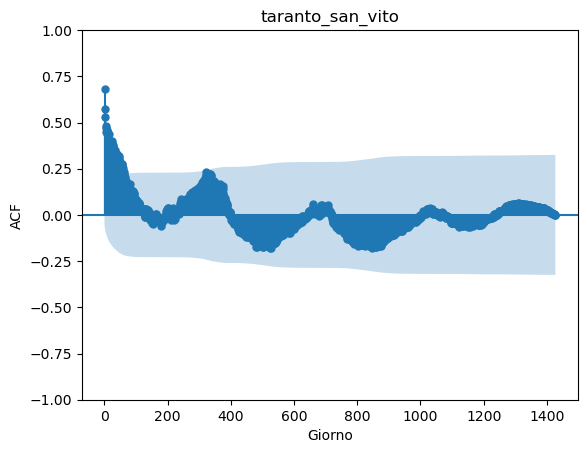

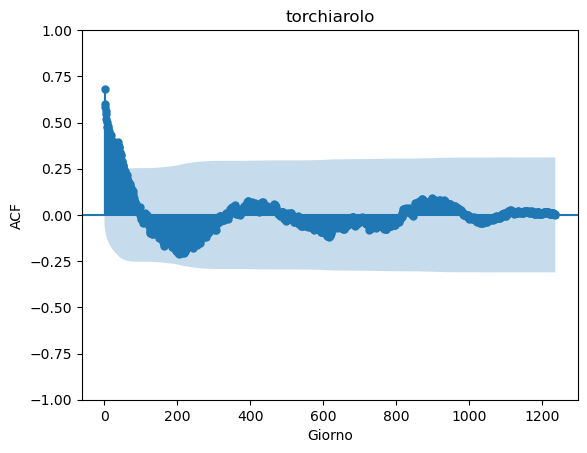

In [4]:
#lecture data
for i in range (0, len(stazioni)):
    path = f"/Users/reginacastrovilli/paper/Data_Max_Min/{stazioni[i]}.csv"
    file = pd.read_csv(path,sep=";")
    dat_0 = file['umr_min']
    x = dat_0.dropna()
    plot_acf(x, lags=range(1, len(x)))
    plt.title(stazioni[i])
    plt.xlabel('Giorno')
    plt.ylabel('ACF') 
    plt.savefig(f"/Users/reginacastrovilli/paper/Grafici/acf_senza_low/umidità/{stazioni[i]}.pdf")


In [5]:
shape_values = []
loc_values = []
scale_values = []  

for i in range (0, len(stazioni)):
    path = f"/Users/reginacastrovilli/paper/Data_Max_Min/{stazioni[i]}.csv"
    file = pd.read_csv(path,sep=";")
    dat_0 = file['umr_min']
    y = dat_0.dropna()
    
    #for the lowess
    x = np.array(list(range(0, len(y))))

    lowess = sm.nonparametric.lowess(y, x, frac=0.003) 
    # Estrai i risultati LOESS
    lowess_x, lowess_y = lowess.T
    
    X_low = y - lowess_y

    # Inizializza le liste per gli shape, i loc e gli scale
    shape, loc, scale = stats.genextreme.fit(X_low)
    #shape, loc e scale sono calcolati per dati-loess
    
    # Aggiungere i valori correnti alle rispettive liste
    shape_values.append(shape)
    loc_values.append(loc)
    scale_values.append(scale)



# Conversione delle liste in array NumPy
shape_values = np.array(shape_values)
loc_values = np.array(loc_values)
scale_values = np.array(scale_values)

shape_values



/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
/Users/reginacastrovilli/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divi

array([-0.77398732, -0.77398732,  0.18241282,  0.16004692,  0.16687366,
        0.17285555,  0.15756127, -0.77398732, -0.77398732,  0.11498146,
        0.15023855,  0.12029912,  0.15024511,  0.15487395,  0.16811029,
        0.14689638,  0.17628666,  0.13011939,  0.16513503, -0.77398732,
        0.14422655, -0.77398732,  0.15148549,  0.10936437, -0.77398732])

In [6]:
mean_shape = np.mean(shape_values)
std_shape = np.std(shape_values)
mean_loc = np.mean(loc_values)
std_loc = np.std(loc_values)
mean_scale = np.mean(scale_values)
std_scale = np.std(scale_values)


In [7]:
shape_values

array([-0.77398732, -0.77398732,  0.18241282,  0.16004692,  0.16687366,
        0.17285555,  0.15756127, -0.77398732, -0.77398732,  0.11498146,
        0.15023855,  0.12029912,  0.15024511,  0.15487395,  0.16811029,
        0.14689638,  0.17628666,  0.13011939,  0.16513503, -0.77398732,
        0.14422655, -0.77398732,  0.15148549,  0.10936437, -0.77398732])

In [8]:
zscore_shape = zscore(shape_values)
zscore_loc = zscore(loc_values)
zscore_scale = zscore(scale_values)
len(zscore_shape)

25

In [9]:
residual_matrix = np.vstack((zscore_shape, zscore_loc, zscore_scale))
residual_matrix_df = pd.DataFrame(residual_matrix.T, columns = ['zscore shape', 'zscore loc', 'z score scale'])


matrix_parameter = np.vstack((shape_values, loc_values, scale_values, zscore_shape, zscore_loc, zscore_scale))
matrix_parameter_df = pd.DataFrame(matrix_parameter.T, columns=['shape', 'loc', 'scale', 'zscore shape', 'zscore_loc', 'zscore_scale'])

distances = distance_matrix(residual_matrix_df.values, residual_matrix_df.values)
ytdist = pd.DataFrame(distances, index = residual_matrix_df.index, columns= residual_matrix_df.index)

ytdist.to_csv("/Users/reginacastrovilli/paper/parameter/parameter_um/distances.csv", sep= ";", index = False)

In [12]:
if 'output_df_zscore_Gev' not in locals():
    output_df_zscore_Gev = pd.DataFrame(columns=['zscore shape', 'zscore_loc', 'zscore_scale'])

# Concatena i due DataFrame
output_df_zscore_Gev = pd.concat([output_df_zscore_Gev, residual_matrix_df], ignore_index=True)
output_df_zscore_Gev.to_csv("/Users/reginacastrovilli/paper/parameter/parameter_um/residual.csv", sep=";", index=False)

In [13]:
if 'output_df_par_Gev' not in locals():
    output_df_par_Gev = pd.DataFrame(columns=['shape', 'loc', 'scale', 'zscore shape', 'zscore_loc', 'zscore_scale'])

# Concatena i due DataFrame
output_df_par_Gev = pd.concat([output_df_par_Gev, matrix_parameter_df], ignore_index=True)
output_df_par_Gev.to_csv("/Users/reginacastrovilli/paper/parameter/parameter_um/parameter.csv", sep=";", index=False)


In [14]:
ytdist


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.000000,3.708542,3.556714,3.814691,3.945127,3.752742,0.000000,0.000000,3.487527,...,4.998460,3.467159,3.477053,3.768232,0.000000,3.901701,0.000000,3.618378,3.910781,0.000000
1,0.000000,0.000000,3.708542,3.556714,3.814691,3.945127,3.752742,0.000000,0.000000,3.487527,...,4.998460,3.467159,3.477053,3.768232,0.000000,3.901701,0.000000,3.618378,3.910781,0.000000
2,3.708542,3.708542,0.000000,0.162117,0.166527,0.318765,0.144405,3.708542,3.708542,0.236469,...,1.574977,0.325816,0.280469,0.137394,3.708542,0.333752,3.708542,0.096363,0.438625,3.708542
3,3.556714,3.556714,0.162117,0.000000,0.314276,0.471682,0.260160,3.556714,3.556714,0.121588,...,1.723896,0.184145,0.157005,0.275729,3.556714,0.465510,3.556714,0.097526,0.553041,3.556714
4,3.814691,3.814691,0.166527,0.314276,0.000000,0.166075,0.100620,3.814691,3.814691,0.346954,...,1.411225,0.478981,0.398997,0.101786,3.814691,0.177141,3.814691,0.222030,0.290113,3.814691
5,3.945127,3.945127,0.318765,0.471682,0.166075,0.000000,0.259858,3.945127,3.945127,0.505827,...,1.266728,0.641196,0.563759,0.207006,3.945127,0.171984,3.945127,0.381547,0.271485,3.945127
6,3.752742,3.752742,0.144405,0.260160,0.100620,0.259858,0.000000,3.752742,3.752742,0.275056,...,1.471790,0.408322,0.314569,0.162483,3.752742,0.208564,3.752742,0.168710,0.302445,3.752742
7,0.000000,0.000000,3.708542,3.556714,3.814691,3.945127,3.752742,0.000000,0.000000,3.487527,...,4.998460,3.467159,3.477053,3.768232,0.000000,3.901701,0.000000,3.618378,3.910781,0.000000
8,0.000000,0.000000,3.708542,3.556714,3.814691,3.945127,3.752742,0.000000,0.000000,3.487527,...,4.998460,3.467159,3.477053,3.768232,0.000000,3.901701,0.000000,3.618378,3.910781,0.000000
9,3.487527,3.487527,0.236469,0.121588,0.346954,0.505827,0.275056,3.487527,3.487527,0.000000,...,1.728198,0.213838,0.095539,0.325170,3.487527,0.466678,3.487527,0.141480,0.531664,3.487527


/var/folders/v8/0qypfq0n1vz50g1zdkphd9680000gn/T/ipykernel_70550/3210551625.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(ytdist.values, method="complete")


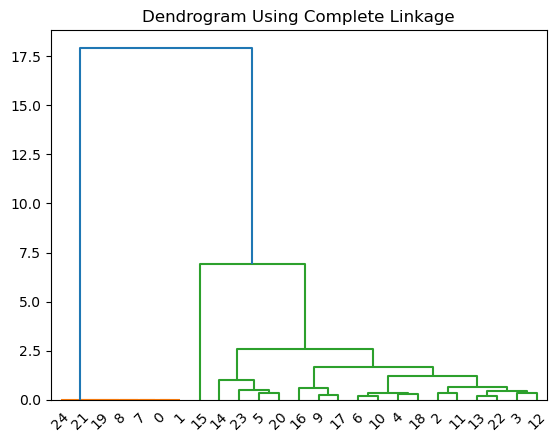

In [16]:
# Calcola il linkage e plotta il dendrogramma

linkage_matrix = linkage(ytdist.values, method="complete")

dendrogram(linkage_matrix, labels=residual_matrix_df.index)

plt.title("Dendrogram Using Complete Linkage")
plt.savefig("/Users/reginacastrovilli/paper/parameter/parameter_um/dendogram_umr.pdf", format="pdf")
plt.show()

#warning: method="complete" sta cercando di calcolare nuovamente le distanze, ma scopre che hai già fornito una matrice di distanza
